In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('data/output.csv')

# Proprocessing

In [3]:
# download nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/zmao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zmao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zmao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
from nltk import PorterStemmer


# text data cleaning
def clean_text_lem(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    lemmatized = ' '.join(lemmatized)

    return lemmatized

def clean_text_stem(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    stemmed = ' '.join(stemmed)
    return stemmed

df['cleaned_text_lem'] = df['full text'].apply(clean_text_lem)
df['cleaned_text_stem'] = df['full text'].apply(clean_text_stem)


In [35]:
df.to_csv('data/output.csv', index=False)

# Colocates

In [4]:

from nltk.collocations import *
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess

def get_colocates(df, label):
    # change the cleaned text into a list
    data = df['cleaned_text_lem'].values.tolist()
    
    # data_word lists 
    data_words = [[word for word in simple_preprocess(str(doc))] for doc in data]
    tokens = [i for j in data_words for i in j]
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    word = 'terrorism'
    
    df_output_col = pd.DataFrame(columns=['rank', 'word_of_interest', 'colocate', 'score', 'label'])
    
    # Ngrams with 'feminism' as a member
    word_filter = lambda *w: word not in w
    
    ## Bigrams - takes around 2-3 minutes per word
    finder = BigramCollocationFinder.from_words(tokens)
    # only bigrams that appear 3+ times
    finder.apply_freq_filter(3)
    # only bigrams that contain word of interest
    finder.apply_ngram_filter(word_filter)
    # return the 20 n-grams with the highest likelihood ratio
    counter = 0 
    for i in finder.score_ngrams(bigram_measures.likelihood_ratio):
        if counter < 20:
            df_output_col.loc[len(df_output_col.index)] = [counter, word, i[0], i[1], label] 
            counter += 1  
    # print(finder.nbest(bigram_measures.likelihood_ratio, 15),)
    # add it to a dictionary of lists 
    return df_output_col

/Users/zmao/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
df1 = df.loc[(df['year'] > 1979) & (df['year'] < 1990)] 
res1 = get_colocates(df1, '1980s')
res1

,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(international, terrorism)",2688.080762,1980s
1,1,terrorism,"(act, terrorism)",909.490840,1980s
2,2,terrorism,"(fight, terrorism)",875.866958,1980s
3,3,terrorism,"(combat, terrorism)",729.648760,1980s
4,4,terrorism,"(sponsored, terrorism)",631.444867,1980s
5,5,terrorism,"(combating, terrorism)",545.978500,1980s
6,6,terrorism,"(terrorism, expert)",368.106522,1980s
7,7,terrorism,"(counter, terrorism)",349.606991,1980s
8,8,terrorism,"(anti, terrorism)",331.757641,1980s
9,9,terrorism,"(fighting, terrorism)",312.583625,1980s


In [6]:
df2 = df.loc[(df['year'] > 1989) & (df['year'] < 2000)] 
res2 = get_colocates(df2, '1990s')
res2

,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(anti, terrorism)",4120.334938,1990s
1,1,terrorism,"(international, terrorism)",1517.379693,1990s
2,2,terrorism,"(act, terrorism)",1338.230560,1990s
3,3,terrorism,"(domestic, terrorism)",1328.444625,1990s
4,4,terrorism,"(fight, terrorism)",1274.200946,1990s
5,5,terrorism,"(sponsor, terrorism)",979.915761,1990s
6,6,terrorism,"(counter, terrorism)",942.883878,1990s
7,7,terrorism,"(terrorism, expert)",857.169147,1990s
8,8,terrorism,"(combat, terrorism)",772.356087,1990s
9,9,terrorism,"(sponsored, terrorism)",568.046459,1990s


In [7]:
df3 = df.loc[(df['year'] > 1999) & (df['year'] < 2010)] 
res3 = get_colocates(df3, '2000s')
res3

,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(anti, terrorism)",11380.902590,2000s
1,1,terrorism,"(war, terrorism)",10763.617094,2000s
2,2,terrorism,"(fight, terrorism)",5824.059707,2000s
3,3,terrorism,"(terrorism, insurance)",4608.492379,2000s
4,4,terrorism,"(terrorism, suspect)",4398.502963,2000s
5,5,terrorism,"(counter, terrorism)",3005.615071,2000s
6,6,terrorism,"(terrorism, risk)",2886.827238,2000s
7,7,terrorism,"(terrorism, coverage)",2881.313285,2000s
8,8,terrorism,"(fighting, terrorism)",2835.804333,2000s
9,9,terrorism,"(act, terrorism)",2479.873985,2000s


In [8]:
df4 = df.loc[(df['year'] > 2009) & (df['year'] <= 2020)]
res4 = get_colocates(df4, '2010s')
res4

,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(domestic, terrorism)",12354.936791,2010s
1,1,terrorism,"(act, terrorism)",6454.446736,2010s
2,2,terrorism,"(counter, terrorism)",6122.358227,2010s
3,3,terrorism,"(anti, terrorism)",5260.286716,2010s
4,4,terrorism,"(fight, terrorism)",4523.585668,2010s
5,5,terrorism,"(sponsor, terrorism)",4490.357472,2010s
6,6,terrorism,"(terrorism, suspect)",4090.660088,2010s
7,7,terrorism,"(terrorism, related)",3477.102580,2010s
8,8,terrorism,"(terrorism, charge)",2804.579542,2010s
9,9,terrorism,"(war, terrorism)",2735.372314,2010s


In [9]:
# combine res1 to res4
df_output = pd.concat([res1, res2, res3, res4])
df_output.to_csv('output/colocates/colocates_by_years_lem.csv', index=False)


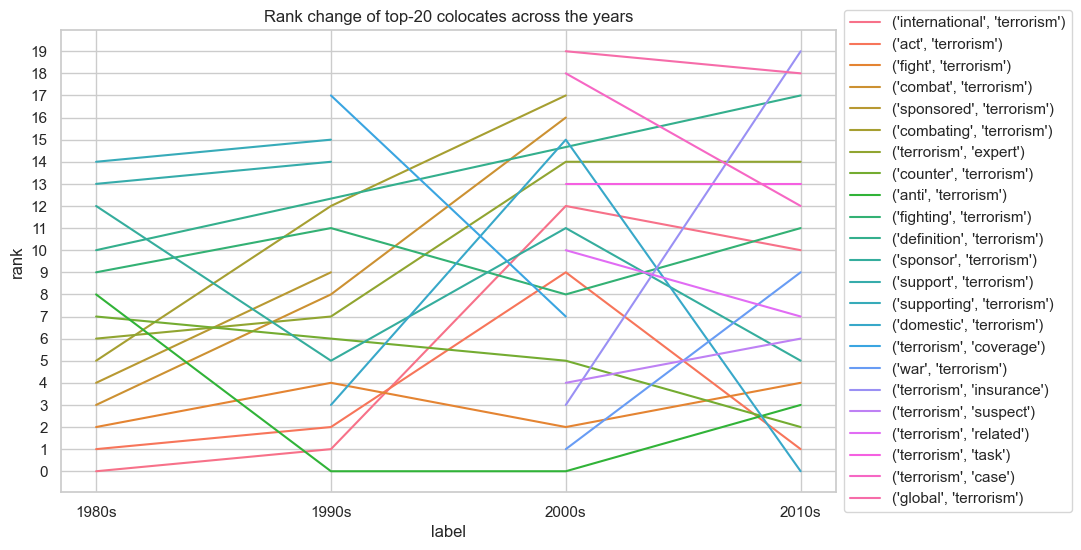

In [10]:

# plot the rank change of colocates across the labels(years)
import seaborn as sns
import matplotlib.pyplot as plt

# filter out collates that appears in only one label
df_output_filtered = df_output.groupby('colocate').filter(lambda x: len(x) > 1)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_output_filtered, x='label', y='rank', hue='colocate')
# adjust the location of the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# make the y axis integer
plt.yticks(range(0, 20))
plt.title('Rank change of top-20 colocates across the years')
plt.savefig('output/colocates/colocates_by_years_lem.png')
plt.show()

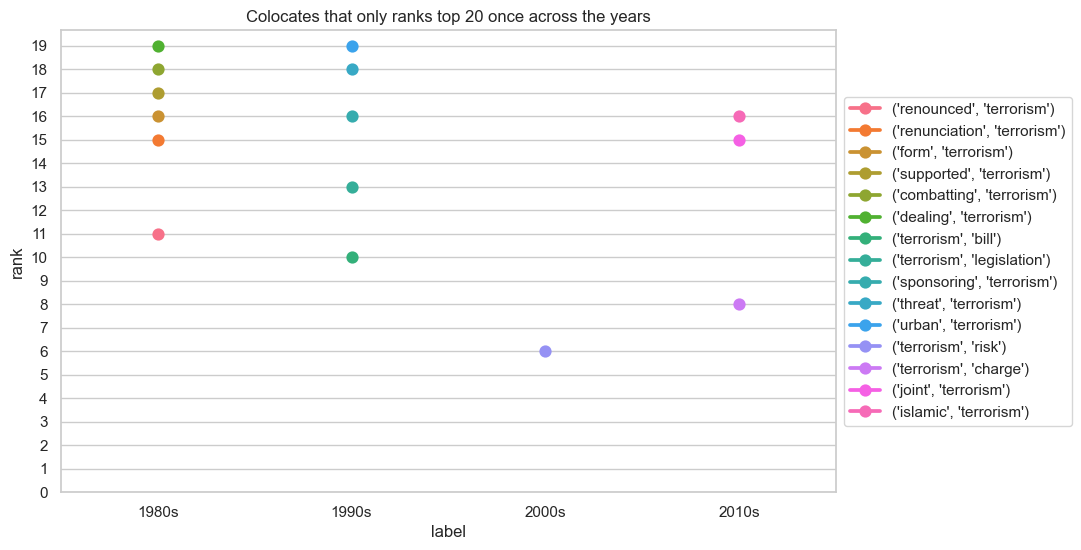

In [11]:
df_output_unique = df_output.groupby('colocate').filter(lambda x: len(x) == 1)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_output_unique, x='label', y='rank', hue='colocate')
# adjust the locatin of the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# make the y axis integer
plt.yticks(range(0, 20))
plt.title('Colocates that only ranks top 20 once across the years')
plt.savefig('output/colocates/colocates_by_years_unique_lem.png')
plt.show()

In [12]:
df5 = df.loc[df['publisher'] == 'the new york times'] 
res5 = get_colocates(df5, 'nyt')
res5


,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(terrorism, suspect)",4478.354748,nyt
1,1,terrorism,"(domestic, terrorism)",3989.483828,nyt
2,2,terrorism,"(international, terrorism)",3728.729497,nyt
3,3,terrorism,"(fight, terrorism)",2949.697369,nyt
4,4,terrorism,"(act, terrorism)",2910.469648,nyt
5,5,terrorism,"(sponsor, terrorism)",2191.253618,nyt
6,6,terrorism,"(terrorism, related)",1455.188141,nyt
7,7,terrorism,"(terrorism, case)",1448.493679,nyt
8,8,terrorism,"(fighting, terrorism)",1390.775501,nyt
9,9,terrorism,"(combating, terrorism)",1221.896548,nyt


In [13]:
df6 = df.loc[df['publisher'] == 'pittsburgh post-gazette'] 
res6 = get_colocates(df6, 'ppg')
res6

,rank,word_of_interest,colocate,score,label
0,0,terrorism,"(anti, terrorism)",1417.882405,ppg
1,1,terrorism,"(counter, terrorism)",617.796956,ppg
2,2,terrorism,"(war, terrorism)",519.505233,ppg
3,3,terrorism,"(fight, terrorism)",454.039907,ppg
4,4,terrorism,"(domestic, terrorism)",390.962111,ppg
5,5,terrorism,"(international, terrorism)",380.932127,ppg
6,6,terrorism,"(act, terrorism)",344.264323,ppg
7,7,terrorism,"(terrorism, suspect)",313.463673,ppg
8,8,terrorism,"(fighting, terrorism)",274.481154,ppg
9,9,terrorism,"(terrorism, related)",257.145855,ppg


In [14]:

df_output_by_media = pd.concat([res5, res6])
df_output_by_media.to_csv('output/colocates/colocates_by_media_lem.csv', index=False)


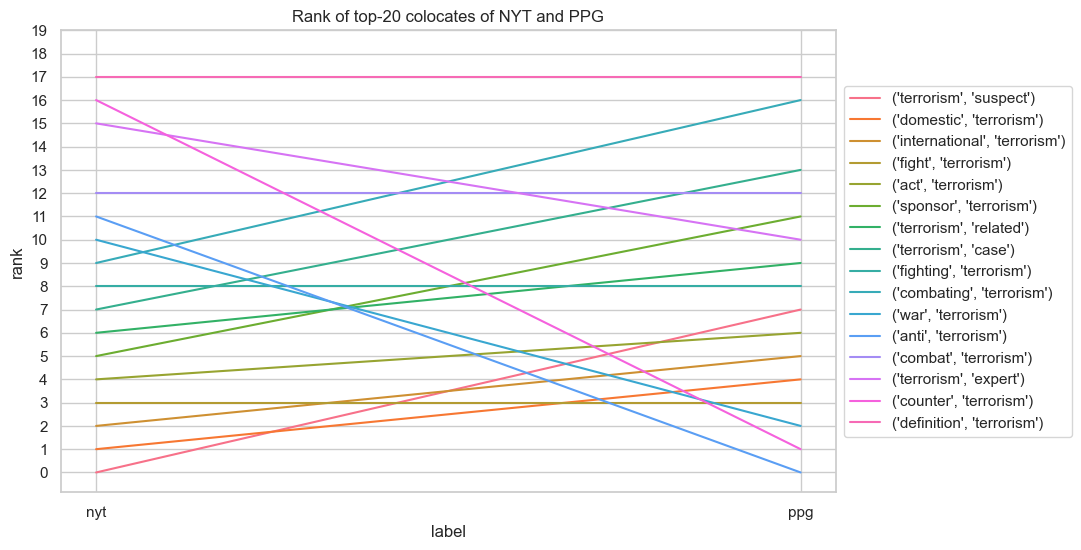

In [15]:
# filter out collates that appears in only one label
df_output_by_media_filtered = df_output_by_media.groupby('colocate').filter(lambda x: len(x) > 1)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_output_by_media_filtered, x='label', y='rank', hue='colocate')
# adjust the location of the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# make the y axis integer
plt.yticks(range(0, 20))
plt.title('Rank of top-20 colocates of NYT and PPG')
plt.savefig('output/colocates/colocates_by_media_lem.png')
plt.show()

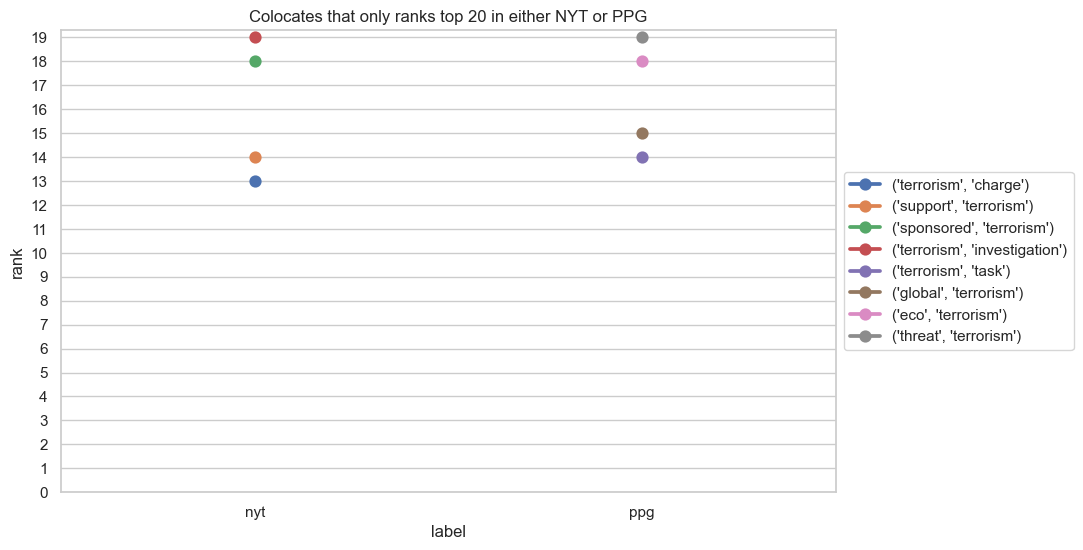

In [16]:
df_output_by_media_unique = df_output_by_media.groupby('colocate').filter(lambda x: len(x) == 1)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_output_by_media_unique, x='label', y='rank', hue='colocate')
# adjust the locatin of the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
# make the y axis integer
plt.yticks(range(0, 20))
plt.title('Colocates that only ranks top 20 in either NYT or PPG')
plt.savefig('output/colocates/colocates_by_media_unique_lem.png')
plt.show()

# Dynamic Topic Modeling by Years

In [17]:
from bertopic import BERTopic

def get_topics(df_news):
    news = df_news.loc[df_news['year'] > 0]['cleaned_text_lem'].tolist()
    topic_model = BERTopic(verbose=True)
    topics, probs = topic_model.fit_transform(news)
    dates = df_news.loc[df_news['year'] > 0]['year'].tolist()
    topics_over_time = topic_model.topics_over_time(news, dates, datetime_format='%Y', nr_bins=20)
    return topic_model, topics_over_time


In [18]:
topic_model, topics_over_time = get_topics(df)
topic_model.get_topic_info().to_csv('output/dtm/topic_info.csv', index=False)
topic_model.get_topic_info()

2024-05-05 22:03:21,886 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/756 [00:00<?, ?it/s]

2024-05-05 22:05:06,515 - BERTopic - Embedding - Completed ✓
2024-05-05 22:05:06,516 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 22:05:18,556 - BERTopic - Dimensionality - Completed ✓
2024-05-05 22:05:18,557 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current p

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8129,-1_terrorist_terrorism_said_state,"[terrorist, terrorism, said, state, american, ...",[washington going get tough president trump vi...
1,0,904,0_pakistan_india_pakistani_indian,"[pakistan, india, pakistani, indian, kashmir, ...",[sixty hour mayhem sown reportedly highly trai...
2,1,691,1_palestinian_israel_israeli_arafat,"[palestinian, israel, israeli, arafat, plo, ha...",[enemy death three decade israel palestine lib...
3,2,681,2_insurance_coverage_insurer_risk,"[insurance, coverage, insurer, risk, tria, los...",[terrorism insurance act passed congress late ...
4,3,340,3_gun_white_shooting_hate,"[gun, white, shooting, hate, supremacist, trum...",[washington president trump monday denounced w...
...,...,...,...,...,...
301,300,10,300_maduro_venezuela_venezuelan_farc,"[maduro, venezuela, venezuelan, farc, caracas,...",[difference united state venezuela appeared ge...
302,301,10,301_norwalk_mumuni_schlotterer_community,"[norwalk, mumuni, schlotterer, community, safe...",[statepoint older generation may recall time d...
303,302,10,302_flynn_kislyak_russian_russia,"[flynn, kislyak, russian, russia, trump, fogle...",[washington president donald trump tuesday def...
304,303,10,303_intelligence_edger_cia_agency,"[intelligence, edger, cia, agency, clapper, mc...",[forewarned forearmed ben franklin peter brook...


In [19]:
topics_over_time.to_csv('output/dtm/topics_over_time.csv', index=False)
topics_over_time


,Topic,Words,Frequency,Timestamp
0,-1,"larkin, radcliff, medal, ribbon, oregon",1,1968.949
1,0,"lohmann, warlord, afghanistan, shsu, maza",1,1968.949
2,-1,"mcguire, executive, overseas, business, study",1,1976.650
3,2,"aba, insurance, bond, bank, blanket",1,1976.650
4,160,"russell, bank, banker, ransom, kidnapings",1,1976.650
...,...,...,...,...
2133,299,"boular, rahman, hussain, dich, miner",3,2017.450
2134,300,"maduro, venezuela, venezuelan, farc, cocaine",5,2017.450
2135,301,"norwalk, schlotterer, hance, choir, reflector",2,2017.450
2136,302,"flynn, kislyak, russian, russia, trump",3,2017.450


In [20]:
# topics that has frequency > 5 across the years
topics_over_time_filtered = topics_over_time[topics_over_time['Frequency'] > 5]
topics_over_time_filtered.to_csv('output/dtm/topics_over_time_frequency_greater_than_5.csv', index=False)
topics_over_time_filtered

,Topic,Words,Frequency,Timestamp
5,-1,"soviet, reagan, subcommittee, mr, political",88,1979.20
7,1,"palestinian, israel, israeli, arab, arafat",16,1979.20
10,7,"libyan, libya, qaddafi, colonel, oil",27,1979.20
11,13,"turkey, turkish, demirel, ankara, evren",41,1979.20
13,17,"ireland, irish, northern, ira, protestant",23,1979.20
...,...,...,...,...
2121,261,"monsey, rabbi, thomas, hanukkah, orthodox",10,2017.45
2125,276,"mgm, company, vega, mandalay, liability",11,2017.45
2129,284,"grewal, jersey, kosher, anderson, fulop",10,2017.45
2130,285,"rusesabagina, rwanda, rwandan, kagame, kigali",11,2017.45


In [49]:
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)
fig.write_image('output/dtm/topics_over_time.png', engine="orca")
fig.show()

# Dynamic Topic Modeling by Media

In [39]:
def get_topics_by_classes(df_news):
    news = df_news['cleaned_text_lem'].tolist()
    topic_model = BERTopic(verbose=True)
    topics, probs = topic_model.fit_transform(news)
    classes = df_news['publisher'].tolist()
    topics_per_class = topic_model.topics_per_class(news, classes=classes)
    return topic_model, topics_per_class

In [40]:
df_nyt = df.loc[df['publisher'] == 'the new york times'] 
df_ppg = df.loc[df['publisher'] == 'pittsburgh post-gazette'] 


In [41]:
# concat df_nyt and df_ppg
df_media = pd.concat([df_nyt, df_ppg])
topic_model_media, topics_per_class_media = get_topics_by_classes(df_media)
topic_model_media.get_topic_info()

2024-05-05 22:23:07,394 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

2024-05-05 22:23:36,105 - BERTopic - Embedding - Completed ✓
2024-05-05 22:23:36,106 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 22:23:38,906 - BERTopic - Dimensionality - Completed ✓
2024-05-05 22:23:38,906 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-05 22:23:38,998 - BERTopic - Cluster - Completed ✓
2024-05-05 22:23:39,001 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-05 22:23:40,827 - BERTopic - Representation - Completed ✓
2it [00:00,  2.04it/s]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2002,-1_mr_said_terrorism_state,"[mr, said, terrorism, state, terrorist, new, a...",[washington nearly decade vocal faction republ...
1,0,189,0_french_france_paris_macron,"[french, france, paris, macron, attack, police...",[man knife killed three people church nice ass...
2,1,185,1_london_british_britain_police,"[london, british, britain, police, said, attac...",[london british government said monday would i...
3,2,121,2_pakistan_pakistani_afghanistan_islamabad,"[pakistan, pakistani, afghanistan, islamabad, ...",[pakistan friend foe mean region editor recent...
4,3,107,3_arafat_palestinian_israel_israeli,"[arafat, palestinian, israel, israeli, peace, ...",[president clinton met today yasir arafat pale...
...,...,...,...,...,...
118,117,11,117_assad_peace_clinton_syria,"[assad, peace, clinton, syria, israel, christo...",[president clinton made one day venture shuttl...
119,118,11,118_carlos_sudan_france_pasqua,"[carlos, sudan, france, pasqua, french, gabeir...",[master disguise elusive outdated photograph e...
120,119,10,119_lebanon_reagan_marine_syrian,"[lebanon, reagan, marine, syrian, neill, syria...",[president reagan speaker house thomas p neill...
121,120,10,120_cheney_obama_guantanamo_vice,"[cheney, obama, guantanamo, vice, bush, dick, ...",[washington despite stiff resistance congress ...


In [42]:
topics_per_class_media.to_csv('output/dtm/topics_per_media.csv', index=False)
topics_per_class_media

,Topic,Words,Frequency,Class
0,-1,"said, terrorism, terrorist, state, mr",344,pittsburgh post-gazette
1,0,"french, france, paris, strasbourg, police",10,pittsburgh post-gazette
2,1,"british, britain, london, police, miranda",14,pittsburgh post-gazette
3,2,"pakistan, pakistani, afghanistan, militant, mu...",27,pittsburgh post-gazette
4,3,"arafat, palestinian, israel, peace, israeli",19,pittsburgh post-gazette
...,...,...,...,...
221,117,"assad, peace, clinton, syria, christopher",7,the new york times
222,118,"carlos, sudan, france, pasqua, gabeira",9,the new york times
223,119,"lebanon, reagan, marine, syrian, neill",10,the new york times
224,120,"cheney, obama, guantanamo, bush, vice",9,the new york times


In [43]:
topics_per_class_media_groupby = topics_per_class_media.groupby('Class').apply(lambda x: x['Frequency'] / x['Frequency'].sum())
topics_per_class_media_normalized = topics_per_class_media.copy()
topics_per_class_media_normalized['Frequency'] = topics_per_class_media_groupby.values
topics_per_class_media_normalized.to_csv('output/dtm/topics_per_media_normalized.csv', index=False)
topics_per_class_media_normalized


/var/folders/dm/hs6ffqd576v39l4vtyx6rpg00000gn/T/ipykernel_91813/390616437.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Topic,Words,Frequency,Class
0,-1,"said, terrorism, terrorist, state, mr",0.378022,pittsburgh post-gazette
1,0,"french, france, paris, strasbourg, police",0.010989,pittsburgh post-gazette
2,1,"british, britain, london, police, miranda",0.015385,pittsburgh post-gazette
3,2,"pakistan, pakistani, afghanistan, militant, mu...",0.029670,pittsburgh post-gazette
4,3,"arafat, palestinian, israel, peace, israeli",0.020879,pittsburgh post-gazette
...,...,...,...,...
221,117,"assad, peace, clinton, syria, christopher",0.001312,the new york times
222,118,"carlos, sudan, france, pasqua, gabeira",0.001687,the new york times
223,119,"lebanon, reagan, marine, syrian, neill",0.001874,the new york times
224,120,"cheney, obama, guantanamo, bush, vice",0.001687,the new york times


In [47]:
fig = topic_model_media.visualize_topics_per_class(topics_per_class_media_normalized, top_n_topics=20)
for trace in fig.data:
    trace.visible = True

fig.write_image('output/dtm/topics_per_media.png', engine="orca")
fig.show()